**absences** number of school absences (numeric: from 0 to 93)  
**G1** first period grade (numeric: from 0 to 20)  
**G2** second period grade (numeric: from 0 to 20)  
**G3** final grade (numeric: from 0 to 20)  

<font color='red'> Linear Regression with G1, G2 variables and G3 (the
output);</font>

<font color='green'>*A-Mat-Reg* **G2**: 30.5%, **absenses**: 20.6%, **G1**: 15.4%, failures: 6.7%, age: 4.2%</font>                 

In [54]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, metrics
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

Coefficients: 
 [0.15326859 0.98686684]
Estimated intercept coefficient: 
 -1.8300121405807328


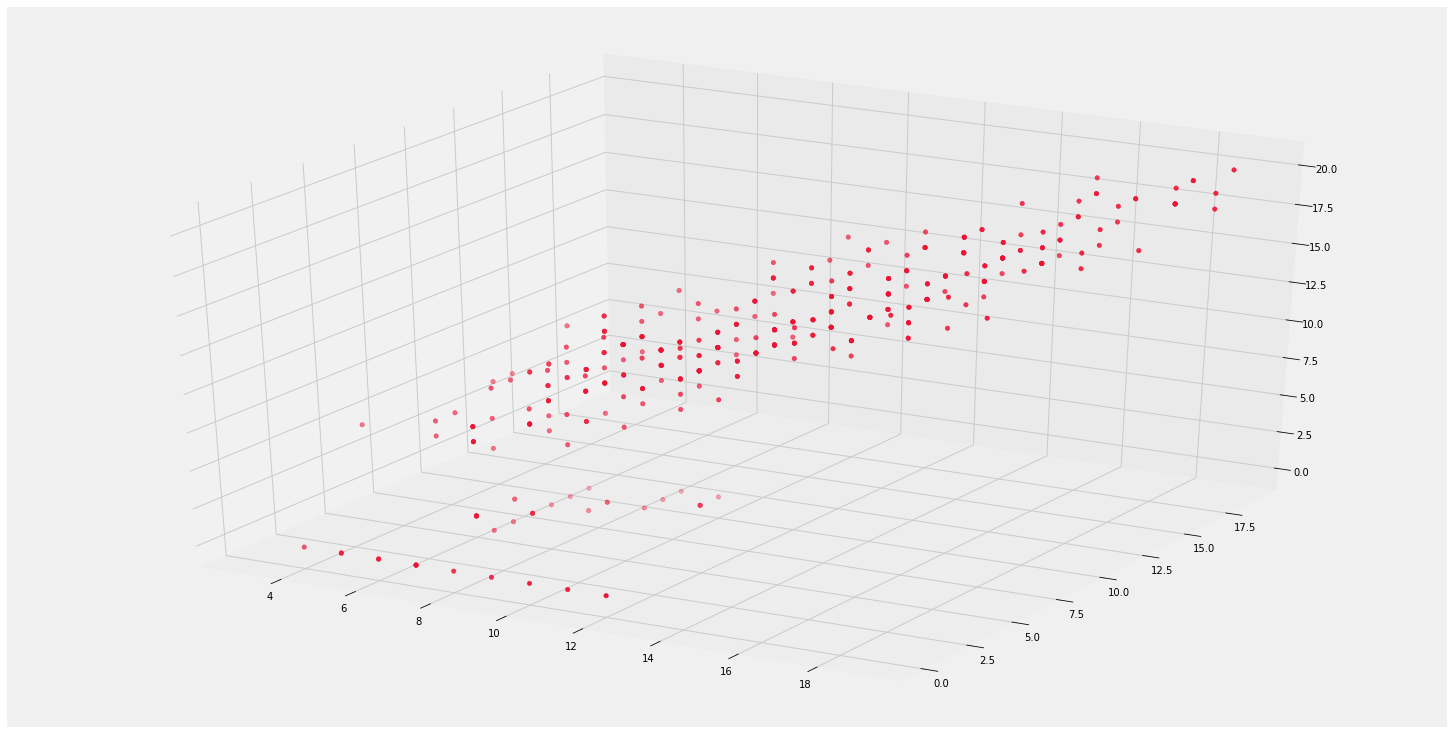

[[1.         0.80146793]
 [0.80146793 1.        ]]
[[1.         0.90486799]
 [0.90486799 1.        ]]


Text(0.5, 0, 'y')

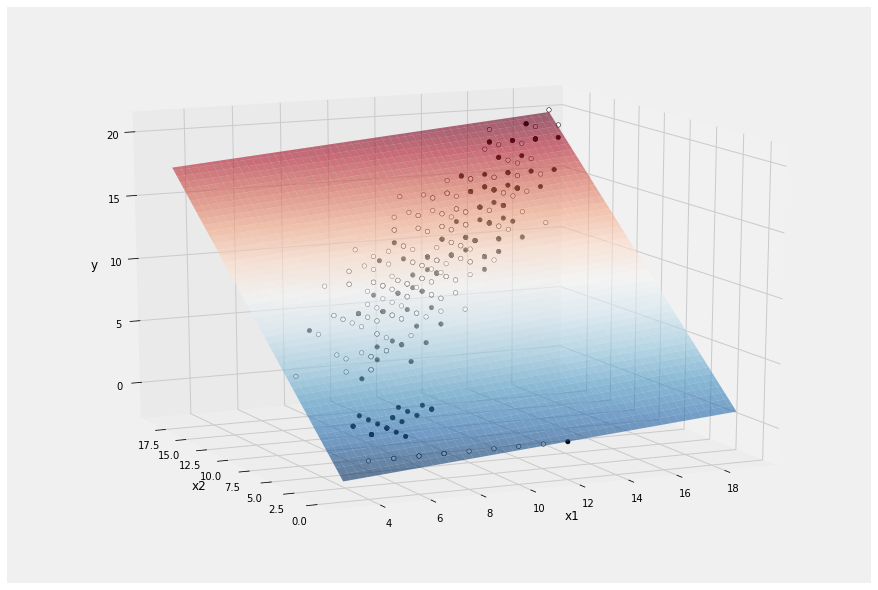

In [56]:
# reading data
dataframe  = pd.read_csv('student-mat.csv', delimiter=';', skipinitialspace=True, usecols=["G1","G2","G3"])
#print(dataframe.shape)
#print(dataframe.head())

grade_first = dataframe['G1'].values
grade_second = dataframe['G2'].values
grade_final = dataframe['G3'].values

X = dataframe.iloc[:,0:2]
y = dataframe.iloc[:,2]
#print(X,Y)
#print(type(X))
#print(X.shape)

#plt.hist(grade_first, bins=20)
#plt.show()
#plt.hist(grade_second, bins=20)
#plt.show()
#plt.hist(grade_final, bins=20)
#plt.show()

#plt.scatter(X, y)
#plt.plot(X, 1.10625609*X - 1.6528038288004616, linestyle='solid')
#plt.show()

#0.15326859 0.98686684
# -1.8300121405807328

 # create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X, y) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
print('Estimated intercept coefficient: \n', reg.intercept_) 

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(grade_first, grade_second, grade_final, color='#ef1234')
plt.show()

print(np.corrcoef(x=grade_first, y=grade_final))
print(np.corrcoef(x=grade_second, y=grade_final))


# plot for residual error 
  
## setting plot style 
#plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
#plt.scatter(reg.predict(X), reg.predict(X) - y, 
#            color = "green", s = 10, label = 'Train data') 
  
# plotting line for zero residual error 
#plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
#plt.legend(loc = 'upper right') 
  
## plot title 
#plt.title("Residual errors") 
  
## function to show plot 
#plt.show() 


#########################
## fit a OLS model with intercept on x1 and x2
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot
# grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.G1.min(), X.G1.max(), 100), 
                       np.linspace(X.G2.min(), X.G2.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].G1, X[resid >= 0].G2, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].G1, X[resid < 0].G2, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')